<a href="https://colab.research.google.com/github/davidsonsantana89/RNA-e-Deep-Learning---CESAR-School-2023.02/blob/main/Atividade%20Aula%203.4/dass_3_4_LogisticRegressionMNIST_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DAVIDSON ALVES SANTOS DE SANTANA

dass@cesar.school

# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [4]:
batch_size = 1000

### Carregamento, criação dataset e do dataloader

In [5]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de treinamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de treinamento: 60

Dimensões dos dados de um minibatch: torch.Size([1000, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [6]:
print('Número de minibatches de treinamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de treinamento: 60


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [7]:
model = torch.nn.Linear(28*28, 10)

In [12]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.0292,  0.1027, -0.0759,  0.4818, -1.0676,  0.5547,  0.5269, -0.2095,
          0.1518,  1.1750]], grad_fn=<AddmmBackward0>)

In [15]:
x, y = dataset_train[0]
x

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

## Treinamento

### Inicialização dos parâmetros

In [16]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [17]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [18]:
print('Final loss:', loss.data)

Final loss: tensor(0.2964)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

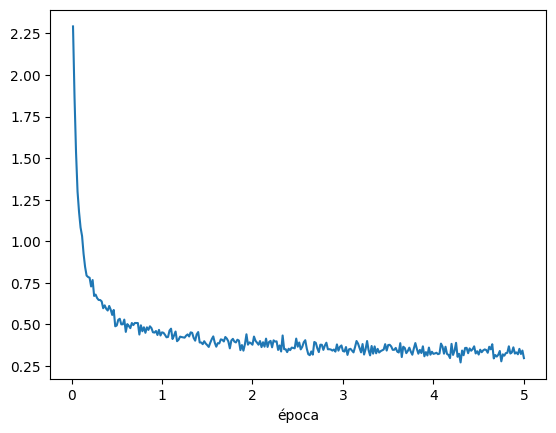

In [19]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

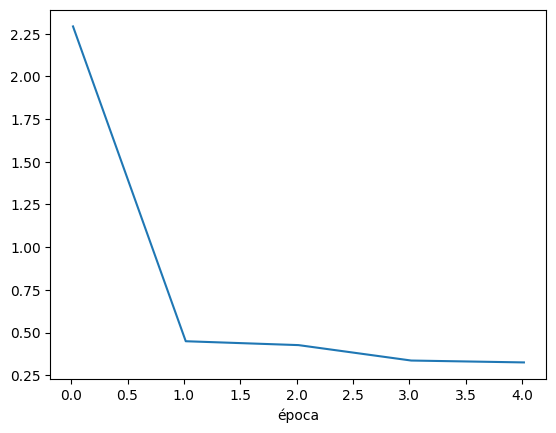

In [20]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?

    R.: O tamanho do mini-batch, nesse experimento, é igual a 1000.

2. Em uma época, quantos mini-batches existem?

    R.: Em uma época existem 60 mini-batches, pois base orginal, com 60 mil amostras, foi "quebrada" em mini-batches de tamanho 1000.

3. Qual é a definição de época?

    R.: Uma época corresponde a uma repetição de um laço de treinamento.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600


In [22]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f'Época: {i + 1}/{n_epochs}, batch: {k + 1}/{len(loader_train)}')

Época: 1/5, batch: 1/60
Época: 1/5, batch: 2/60
Época: 1/5, batch: 3/60
Época: 1/5, batch: 4/60
Época: 1/5, batch: 5/60
Época: 1/5, batch: 6/60
Época: 1/5, batch: 7/60
Época: 1/5, batch: 8/60
Época: 1/5, batch: 9/60
Época: 1/5, batch: 10/60
Época: 1/5, batch: 11/60
Época: 1/5, batch: 12/60
Época: 1/5, batch: 13/60
Época: 1/5, batch: 14/60
Época: 1/5, batch: 15/60
Época: 1/5, batch: 16/60
Época: 1/5, batch: 17/60
Época: 1/5, batch: 18/60
Época: 1/5, batch: 19/60
Época: 1/5, batch: 20/60
Época: 1/5, batch: 21/60
Época: 1/5, batch: 22/60
Época: 1/5, batch: 23/60
Época: 1/5, batch: 24/60
Época: 1/5, batch: 25/60
Época: 1/5, batch: 26/60
Época: 1/5, batch: 27/60
Época: 1/5, batch: 28/60
Época: 1/5, batch: 29/60
Época: 1/5, batch: 30/60
Época: 1/5, batch: 31/60
Época: 1/5, batch: 32/60
Época: 1/5, batch: 33/60
Época: 1/5, batch: 34/60
Época: 1/5, batch: 35/60
Época: 1/5, batch: 36/60
Época: 1/5, batch: 37/60
Época: 1/5, batch: 38/60
Época: 1/5, batch: 39/60
Época: 1/5, batch: 40/60
Época: 1/

2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [81]:
batch_size = 5000

In [82]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de treinamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de treinamento: 12

Dimensões dos dados de um minibatch: torch.Size([5000, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


In [83]:
model = torch.nn.Linear(28*28, 10)

In [84]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.7720,  1.0315, -0.9538,  0.3657, -0.2041,  0.9138,  0.7210,  0.2676,
          0.0914,  0.5793]], grad_fn=<AddmmBackward0>)

In [85]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [86]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        print(f'Época: {i + 1}/{n_epochs}, batch: {k + 1}/{len(loader_train)}')

Época: 1/5, batch: 1/12
Época: 1/5, batch: 2/12
Época: 1/5, batch: 3/12
Época: 1/5, batch: 4/12
Época: 1/5, batch: 5/12
Época: 1/5, batch: 6/12
Época: 1/5, batch: 7/12
Época: 1/5, batch: 8/12
Época: 1/5, batch: 9/12
Época: 1/5, batch: 10/12
Época: 1/5, batch: 11/12
Época: 1/5, batch: 12/12
Época: 2/5, batch: 1/12
Época: 2/5, batch: 2/12
Época: 2/5, batch: 3/12
Época: 2/5, batch: 4/12
Época: 2/5, batch: 5/12
Época: 2/5, batch: 6/12
Época: 2/5, batch: 7/12
Época: 2/5, batch: 8/12
Época: 2/5, batch: 9/12
Época: 2/5, batch: 10/12
Época: 2/5, batch: 11/12
Época: 2/5, batch: 12/12
Época: 3/5, batch: 1/12
Época: 3/5, batch: 2/12
Época: 3/5, batch: 3/12
Época: 3/5, batch: 4/12
Época: 3/5, batch: 5/12
Época: 3/5, batch: 6/12
Época: 3/5, batch: 7/12
Época: 3/5, batch: 8/12
Época: 3/5, batch: 9/12
Época: 3/5, batch: 10/12
Época: 3/5, batch: 11/12
Época: 3/5, batch: 12/12
Época: 4/5, batch: 1/12
Época: 4/5, batch: 2/12
Época: 4/5, batch: 3/12
Época: 4/5, batch: 4/12
Época: 4/5, batch: 5/12
Época: 

In [87]:
print('Final loss:', loss.data)

Final loss: tensor(0.4537)


Text(0.5, 0, 'época')

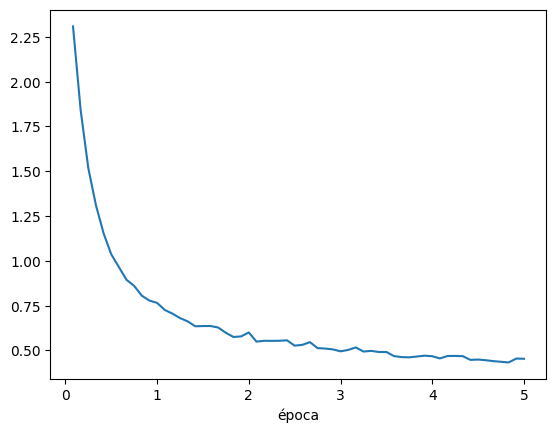

In [88]:
plt.plot(epochs, losses)
plt.xlabel('época')

Percebe-se que aumentando-se o tamanho do batch, consequentemente diminuindo-se o número de mini batches, o erro final aumenta, após cada experimento com o tamanho do batch.

## Conclusões sobre os experimentos deste notebook
